In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [2]:
#Load the Data and imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [3]:
# Checking for messing values
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB
User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
T

In [4]:
#Data Cleaning
df['User ID'] = df['User ID'].astype(str)
df['Fan Challenges Completed'] = df['Fan Challenges Completed'].astype(int)
df['Predictive Accuracy (%)'] = df['Predictive Accuracy (%)'].astype(int)
df['Virtual Merchandise Purchases'] = df['Virtual Merchandise Purchases'].astype(int)
df['Sponsorship Interactions (Ad Clicks)'] = df['Sponsorship Interactions (Ad Clicks)'].astype(int)
df['Time on Live 360 (mins)'] = df['Time on Live 360 (mins)'].astype(int)
df['Real-Time Chat Activity (Messages Sent)'] = df['Real-Time Chat Activity (Messages Sent)'].astype(int)

df.duplicated().sum()
df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


       Fan Challenges Completed  Predictive Accuracy (%)  \
count                 80.000000                80.000000   
mean                   5.887500                74.750000   
std                    2.868395                14.000452   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.000000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                      80.000000                             80.000000   
mean                        3.337500                              9.137500   
std                         1.757038                              6.509475   
min                         1.000000                              0.000000   
25%                         2.000000                              2.0

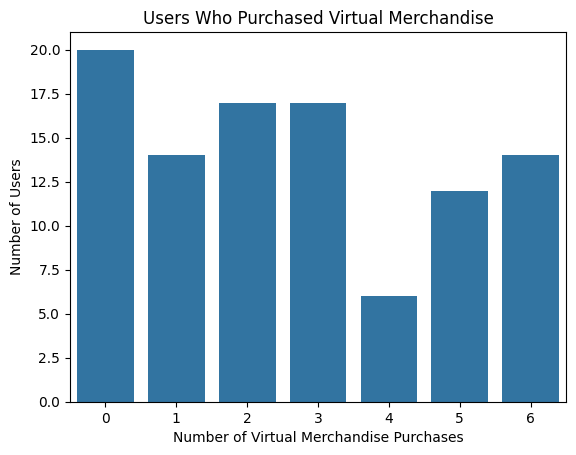

In [5]:
merch_purchase_df = df[df['Virtual Merchandise Purchases'] > 0]
print(merch_purchase_df.describe())
sns.countplot(x='Virtual Merchandise Purchases', data=df)
plt.title('Users Who Purchased Virtual Merchandise')
plt.xlabel('Number of Virtual Merchandise Purchases')
plt.ylabel('Number of Users')
plt.show()

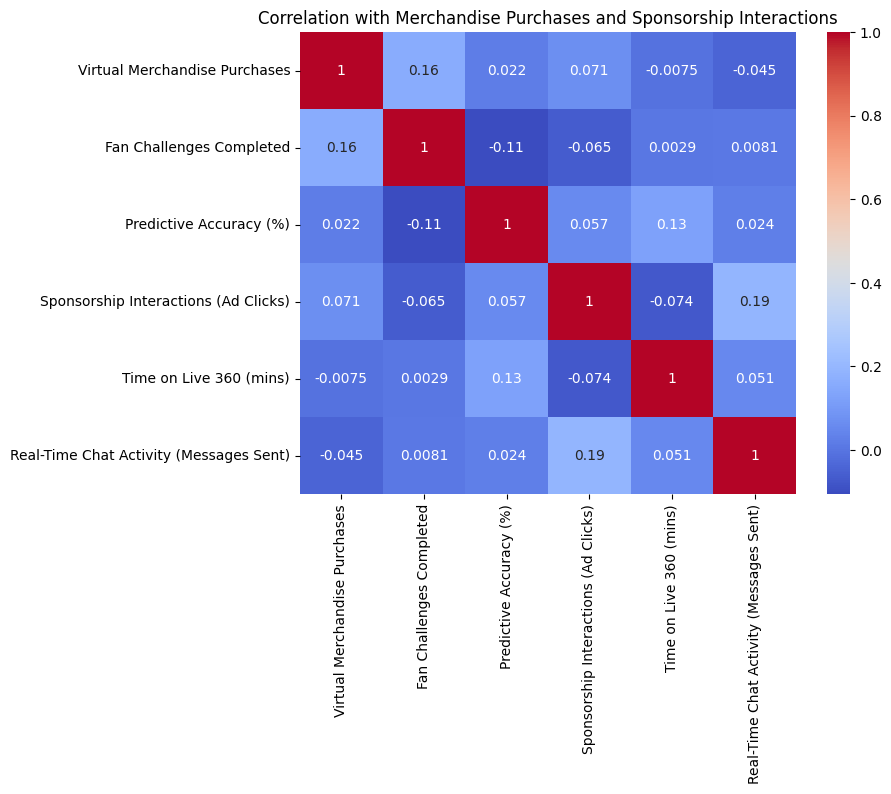

In [6]:
numeric_df = df[['Fan Challenges Completed', 
                  'Predictive Accuracy (%)', 
                  'Virtual Merchandise Purchases', 
                  'Sponsorship Interactions (Ad Clicks)', 
                  'Time on Live 360 (mins)', 
                  'Real-Time Chat Activity (Messages Sent)']]

correlation = numeric_df[['Virtual Merchandise Purchases', 
                          'Fan Challenges Completed', 
                          'Predictive Accuracy (%)', 
                          'Sponsorship Interactions (Ad Clicks)', 
                          'Time on Live 360 (mins)', 
                          'Real-Time Chat Activity (Messages Sent)']].corr()



# Visualize the focused correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation with Merchandise Purchases and Sponsorship Interactions')
plt.show()

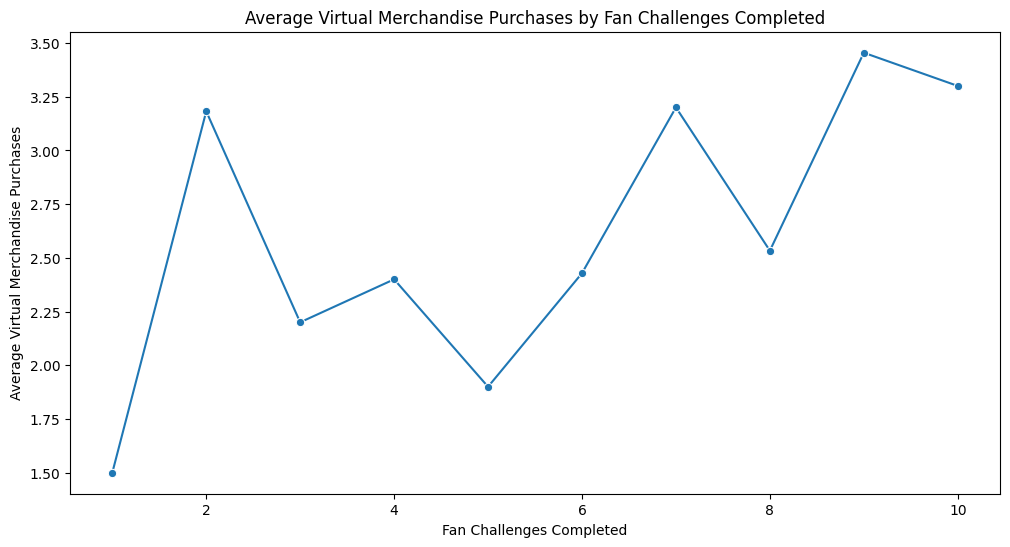

In [7]:
activity_agg = df.groupby('Fan Challenges Completed').agg({
    'Virtual Merchandise Purchases': 'mean',
    'Sponsorship Interactions (Ad Clicks)': 'mean',
    'Time on Live 360 (mins)': 'mean',
    'Real-Time Chat Activity (Messages Sent)': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=activity_agg, x='Fan Challenges Completed', y='Virtual Merchandise Purchases', marker='o')
plt.title('Average Virtual Merchandise Purchases by Fan Challenges Completed')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Average Virtual Merchandise Purchases')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

user_metrics = df.groupby('User ID').agg({
    'Virtual Merchandise Purchases': 'sum',
    'Fan Challenges Completed': 'sum',
    'Predictive Accuracy (%)': 'mean',
    'Sponsorship Interactions (Ad Clicks)': 'sum',
    'Time on Live 360 (mins)': 'sum',
    'Real-Time Chat Activity (Messages Sent)': 'sum'
}).reset_index()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_metrics.drop('User ID', axis=1))
kmeans = KMeans(n_clusters=4, random_state=42)
user_metrics['Cluster'] = kmeans.fit_predict(scaled_data)
X = user_metrics.drop(['User ID', 'Virtual Merchandise Purchases'], axis=1)
y = user_metrics['Virtual Merchandise Purchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.60      0.33         5
           1       0.00      0.00      0.00         5
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2
           5       0.14      0.20      0.17         5
           6       0.50      0.33      0.40         3

    accuracy                           0.23        30
   macro avg       0.20      0.23      0.20        30
weighted avg       0.18      0.23      0.19        30

[[3 0 0 1 0 1 0]
 [1 0 1 0 0 2 1]
 [2 0 2 0 0 0 0]
 [3 0 1 0 0 2 0]
 [0 0 0 2 0 0 0]
 [3 0 0 1 0 1 0]
 [1 0 0 0 0 1 1]]


/Users/adityamachiroutu/Desktop/xtern/path/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adityamachiroutu/Desktop/xtern/path/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adityamachiroutu/Desktop/xtern/path/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1

In [9]:
# Fan Challenge:

# Get all fans to do challenge, watch live, events, and engage with spponsers.
# If a user rreaches a certain amount of engagement, the get exclusive merchendice.
#Predicted Outcomes:
#Increased Engagement: Anticipate a significant boost in user activity during race events as users strive to complete challenges.
#Higher Merchandise Sales: Users who complete activities will be more likely to purchase virtual merchandise, leading to increased revenue.
# Data Insights: Collect engagement data to improve the models.